In [71]:
#импортируем необходимые модули
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [72]:
def recall(y_hat, y, thresh):
    sumr = 0
    for i in range(len(y)):
        sumr = sumr + ((((y[i] - 1) * 2) + 1) == (y_hat[i] > thresh))
    return sumr / sum(y)
    
def precision(y_hat, y, thresh):
    sumr = 0
    sum2 = 0
    for i in range(len(y)):
        sumr = sumr + ((((y[i] - 1) * 2) + 1) == (y_hat[i] > thresh))
        sum2 = sum2 + (y_hat[i] > thresh)
    return sumr/sum2
    #return sum((((y - 1) * 2) + 1) == (y_hat > thresh)) / sum(y_hat > thresh)
    
def accuracy(y_hat, y, thresh):
    sumr = 0
    for i in range(len(y)):
        sumr = sumr + (y[i] == (y_hat[i] > thresh))
    return sumr / len(y)
    
def f1(y_hat, y, thresh):
    return 2 * recall(y_hat, y , thresh) * precision(y_hat, y, thresh) / (recall(y_hat, y , thresh) + precision(y_hat, y, thresh))

In [73]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

for i in range(10):
    print("Test {} passed".format(i))
    y_hat = np.random.random(30)
    y = np.random.random(30) > 0.7
    thresh = np.random.random()
    
    assert abs(recall(y_hat, y, thresh) - recall_score(y_true=y, y_pred=y_hat > thresh)) < 0.1
    assert abs(precision(y_hat, y, thresh) - precision_score(y_true=y, y_pred=y_hat > thresh)) < 0.1
    assert abs(accuracy(y_hat, y, thresh) - accuracy_score(y_true=y, y_pred=y_hat > thresh)) < 0.1
    assert abs(f1(y_hat, y, thresh) - f1_score(y_true=y, y_pred=y_hat > thresh)) < 0.1

/home/twsea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/home/twsea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Test 0 passed
Test 1 passed
Test 2 passed
Test 3 passed
Test 4 passed
Test 5 passed
Test 6 passed
Test 7 passed
Traceback (most recent call last):
  File "/home/twsea/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-73-f7019d467531>", line 10, in <module>
    assert abs(precision(y_hat, y, thresh) - precision_score(y_true=y, y_pred=y_hat > thresh)) < 0.1
AssertionError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/twsea/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 1863, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AssertionError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/twsea/anaconda3/lib/python3.6/site-packages/

AssertionError: 

In [74]:
y_hat = np.array([1,1,1,1,1,1,1,1,1,1,1]) #TODO предсказания, чтобы выбить precision 0.9 плохим классификатором
y = np.array([1,0,0,0,0,0,0,0,0,0,0]) #TODO метки, чтобы выбить precision 0.9 плохим классификатором
t = 0.5 #TODO порог, чтобы выбить precision 0.9 плохим классификатором

assert recall(y_hat, y, t) > 0.9

y_hat = np.array([1,0,0,0,0,0,0,0,0,0]) #TODO предсказания, чтобы выбить precision 0.9 плохим классификатором
y = np.array([1,1,1,1,1,1,1,1,1,1]) #TODO метки, чтобы выбить precision 0.9 плохим классификатором
t = 0.5 #TODO порог, чтобы выбить precision 0.9 плохим классификатором

assert precision(y_hat, y, t) > 0.9

y_hat = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])#TODO предсказания, чтобы выбить accuracy 0.9 плохим классификатором
y = np.array([1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])#TODO метки, чтобы выбить accuracy 0.9 плохим классификатором
t = 0.9 #TODO порог, чтобы выбить accuracy 0.9 плохим классификатором

assert accuracy(y_hat, y, t) > 0.9

# Функция потерь для логистической регрессии (из материалов курса по нейронным сетям)

Давайте получим функцию потерь аналогичным образом, как мы это сделали с линейной регрессией.


логарифм правдоподобия
$$
\large 
\begin{array}{rcl} 
    \log P\left(\vec{y} \mid X, \vec{w}\right) 
        &=& \log \prod_{i=1}^{\ell} P\left(y = y_i \mid \vec{x_i}, \vec{w}\right) \\ 
        &=& \log \prod_{i=1}^{\ell} \sigma(y_i\vec{w}^T\vec{x_i}) \\ 
        &=& \sum_{i=1}^{\ell} \log \sigma(y_i\vec{w}^T\vec{x_i}) \\ 
        &=& \sum_{i=1}^{\ell} \log \frac{1}{1 + \exp^{-y_i\vec{w}^T\vec{x_i}}} \\ 
        &=& - \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\vec{w}^T\vec{x_i}}) 
\end{array}
$$
который и будем оптимизировать. 

Данная функция потерь 
$$
\large L(\vec{x},\vec{y},\vec{w}) = \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\vec{w}^T\vec{x_i}})
$$
называется логистичской функцией потерь или сокращенно logloss.

Дано:
- X - обучающее множество
- Y - метки классов для обучающего множества
- $\eta$ - скорость обучения

Алгоритм:
1. инициализируем $\vec{w}_0$ небольшими случайными значениями
2. выбираем случайный объект $x_i$ с меткой $y_i$
3. обновляем веса $ \vec{w}_{t+1} = \vec{w}_{t} - \eta \nabla L $
4. если условие остановки не выполнело, возвращаемся к шагу 2

Выпишем градиент функции потерь:
$$
    \nabla L = \left\{ - \frac{y_i \vec{x_i} }  { 1 + \exp^{y_i\vec{w}^T\vec{x_i}} } + \lambda \vec{w} \right\} 
$$

На практике, в качестве условия остановки, часто используют изменение функции потерь на тестовой выборке

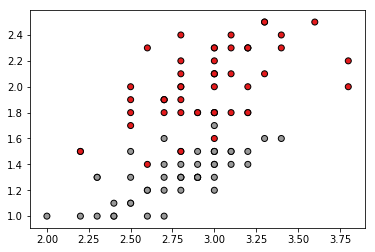

In [77]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

iris = datasets.load_iris()
selector = iris.target != 0 # ограничемся только двумя классами
X = iris.data[:, [1,3]][selector]  # и двумя переменными
y = iris.target[selector]
y[y==2] = 0 # конвертируем метки классов к 1/-1
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')

In [78]:
X_train = X[:80]
X_test = X[80:]

In [79]:
X_train.shape

(80, 2)

In [80]:
polytrans = PolynomialFeatures(3)
X_train = polytrans.fit_transform(X_train)
X_test = polytrans.fit_transform(X_test)

In [81]:
clf_1 = linear_model.LogisticRegression(C = 0.1)#TODO ОБучить логистическую регрессию на train с C=0.1
pred_1 = #TODO Предсказать логистической регрессией на трейне
pred_test = #TODO Предсказать логистической регрессией на тесте
#TODO Сранивть метрики

SyntaxError: invalid syntax (<ipython-input-81-ded600a089d6>, line 2)

In [82]:
#TODO обучим логистическую регрессию с разными C и посмотрим как меняются метрики на трейне и на тесте

# Пример текстовой классификации

In [83]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package wordnet to /home/twsea/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/twsea/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
data = pd.read_csv('products_sentiment_train.tsv', sep='\t', header=None)
data.head()

,Review,Label
0,2 take around 10000 640x480 picture,1
1,i downloaded a trial version of computer assoc...,1
2,the wrt54g plus the hga7t is a perfect solutio...,1
3,i dont especially like how music file are unst...,0
4,i wa using the cheapie pail and it worked ok u...,1


In [85]:
data.columns = ['Review', 'Label']
data.head()

,Review,Label
0,2 take around 10000 640x480 picture,1
1,i downloaded a trial version of computer assoc...,1
2,the wrt54g plus the hga7t is a perfect solutio...,1
3,i dont especially like how music file are unst...,0
4,i wa using the cheapie pail and it worked ok u...,1


In [89]:
lemmatizer = WordNetLemmatizer()

In [90]:
import string
exclude = set(string.punctuation)

In [91]:
data['Review'] = data['Review'].apply(lambda x:
                                      "".join(i for i in x if i not in exclude))

In [92]:
data.head()

,Review,Label
0,2 take around 10000 640x480 picture,1
1,i downloaded a trial version of computer assoc...,1
2,the wrt54g plus the hga7t is a perfect solutio...,1
3,i dont especially like how music file are unst...,0
4,i wa using the cheapie pail and it worked ok u...,1


In [93]:
data['Review'] = data['Review'].apply(lambda x:
                                      " ".join(lemmatizer.lemmatize(i) for i in x.split()))

In [94]:
data.loc[3, 'Review']

'i dont especially like how music file are unstructured basically they are just dumped into one folder with no organization like you might have in window explorer folder and subfolders'

In [95]:
data.head()

,Review,Label
0,2 take around 10000 640x480 picture,1
1,i downloaded a trial version of computer assoc...,1
2,the wrt54g plus the hga7t is a perfect solutio...,1
3,i dont especially like how music file are unst...,0
4,i wa using the cheapie pail and it worked ok u...,1


In [96]:
vectorizer = CountVectorizer().fit(data['Review'])

In [97]:
features = vectorizer.transform(data['Review'])

In [98]:
data.shape

(2000, 2)

In [99]:
features

<2000x3749 sparse matrix of type '<class 'numpy.int64'>'
	with 29292 stored elements in Compressed Sparse Row format>

In [100]:
clf = LogisticRegression()
clf.fit(features, data.Label)

/home/twsea/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [102]:
review_ = "unfortunately	"
vector_review = vectorizer.transform([review_])

In [103]:
diction_ = [ (k, v) for k, v in vectorizer.vocabulary_.items()]
diction_.sort(key=lambda x: x[1])
diction_ = pd.DataFrame(diction_, columns=['Feature', 'Position'])
diction_.head()

,Feature,Position
0,10,0
1,100,1
2,1000,2
3,10000,3
4,1011,4


In [104]:
diction_['Weight'] = clf.coef_[0]

In [105]:
diction_.sort_values('Weight')

,Feature,Position,Weight
3463,unfortunately,3463,-1.520175
551,button,551,-1.476498
2282,only,2282,-1.464117
3510,useless,3510,-1.430582
277,annoying,277,-1.382869
2877,scratch,2877,-1.381168
3703,worst,3703,-1.342635
2210,norton,2210,-1.310816
1751,isn,1751,-1.296972
224,after,224,-1.178542


In [106]:
vector_review

<1x3749 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [107]:
clf.predict(vector_review)

array([0])

In [108]:
wordnet_lemmatizer = WordNetLemmatizer()
porter_stemmer = PorterStemmer()
for i in range(0,len(data)):
    arr = data.iloc[i,0].split(' ')
    data.iloc[i,0] = ' '.join([str(porter_stemmer.stem(wordnet_lemmatizer.lemmatize(arr[i]))) for i in range(0, len(arr))])

In [109]:
vectors = [CountVectorizer(), TfidfVectorizer()]
parameters_grid = {
    'vectorizer__stop_words' : [nltk.corpus.stopwords.words('english'), 'english', None],
    'vectorizer__ngram_range' : [(1,2), (1,3)],
    'classifier__C':[0.25,0.5,1,2,5,10,15],
    'classifier__class_weight':['balanced', None],
    'classifier__max_iter':[70,100,200],
    'classifier__penalty':['l2','l1']
}
for vect in vectors:
        pipeline = Pipeline([('vectorizer', vect),('classifier',LogisticRegression())])
        grid_cv = grid_search.GridSearchCV(pipeline, parameters_grid, n_jobs=-1, scoring = 'accuracy', cv = 3)
        grid_cv.fit(data[0],data[1])
        print('Classifier: logReg, vectoizer: ',vect,', best_score: ',grid_cv.best_score_, grid_cv.best_params_)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/twsea/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-109-a90e9a71481d>", line 12, in <module>
    grid_cv = grid_search.GridSearchCV(pipeline, parameters_grid, n_jobs=-1, scoring = 'accuracy', cv = 3)
NameError: name 'grid_search' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/twsea/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 1863, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/twsea/anaconda3/lib/python3.6/site-packages/IPython/core/ultratb.py", line 1095, in get_records
    return _fixed_getinnerfr

NameError: name 'grid_search' is not defined

In [110]:
data_test = pd.read_csv('products_sentiment_test.tsv', sep='\t')
data_test.head()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/twsea/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-110-7a6e5caf1474>", line 1, in <module>
    data_test = pd.read_csv('products_sentiment_test.tsv', sep='\t')
  File "/home/twsea/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py", line 678, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "/home/twsea/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py", line 440, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/home/twsea/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py", line 787, in __init__
    self._make_engine(self.engine)
  File "/home/twsea/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py", line 1014, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/home/twsea/anaconda3/lib/python3.6/site-packages

FileNotFoundError: File b'products_sentiment_test.tsv' does not exist

In [111]:
for i in range(0,len(data_test)):
    arr = data_test.iloc[i,1].split(' ')
    data_test.iloc[i,1] = ' '.join([str(porter_stemmer.stem(wordnet_lemmatizer.lemmatize(arr[i].lower()))) for i in range(0, len(arr))])
res = clf.predict(vectorizer.transform(data_test.text))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/twsea/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-111-884ba37e8189>", line 1, in <module>
    for i in range(0,len(data_test)):
NameError: name 'data_test' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/twsea/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 1863, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/twsea/anaconda3/lib/python3.6/site-packages/IPython/core/ultratb.py", line 1095, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/home/twsea/ana

NameError: name 'data_test' is not defined

In [ ]:
#Appendix TODO together. Классификация отзывов о технике на русском